# 1. Import necessary libraries

In [91]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [2]:
book = pd.read_csv('book.csv')
book

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  ItalAtlas  ItalArt  Florence
0            0         1        0         1       0       0        1         0          0        0         0
1            1         0        0         0       0       0        0         0          0        0         0
2            0         0        0         0       0       0        0         0          0        0         0
3            1         1        1         0       1       0        1         0          0        0         0
4            0         0        1         0       0       0        1         0          0        0         0
...        ...       ...      ...       ...     ...     ...      ...       ...        ...      ...       ...
1995         0         0        1         0       0       1        1         1          0        1         1
1996         0         0        0         0       0       0        0         0          0        0         0
1997         0         0        0         0       0       0        0         0          0        0         0
1998         0         0        1         0       0       0        0         0          0        0         0
1999         0         0        0         0       0       0        0         0          0        0         0

[2000 rows x 11 columns]

# 3. Data Understanding

In [88]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [3]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [5]:
book.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

# Apriori Algorithm

In [81]:
freq_itemsets = apriori(book, min_support=0.1, use_colnames=True, verbose=1)
freq_itemsets

Processing 44 combinations | Sampling itemset size 4


support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (ChildBks, YouthBks)
10   0.2560            (ChildBks, CookBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ChildBks, ArtBks)
14   0.1950            (GeogBks, ChildBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (YouthBks, ArtBks)
18   0.1205            (GeogBks, YouthBks)
19   0.1875            (DoItYBks, CookBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925             (GeogBks, CookBks)
23   0.1135            (ItalCook, CookBks)
24   0.1055             (DoItYBks, RefBks)
25   0.1235             (DoItYBks, ArtBks)
26   0.1325            (DoItYBks, GeogBks)
27   0.1105              (GeogBks, RefBks)
28   0.1275              (GeogBks, ArtBks)
29   0.1290  (ChildBks, YouthBks, CookBks)
30   0.1460  (DoItYBks, ChildBks, CookBks)
31   0.1225    (ChildBks, RefBks, CookBks)
32   0.1265    (ChildBks, ArtBks, CookBks)
33   0.1495   (GeogBks, ChildBks, CookBks)
34   0.1045  (DoItYBks, ChildBks, GeogBks)
35   0.1020    (GeogBks, ChildBks, ArtBks)
36   0.1015    (DoItYBks, ArtBks, CookBks)
37   0.1085   (DoItYBks, GeogBks, CookBks)
38   0.1035     (GeogBks, ArtBks, CookBks)

In [82]:
best_associates = association_rules(freq_itemsets, metric='confidence', min_threshold=0.5)
best_associates

antecedents          consequents  antecedent support  ...      lift  leverage  conviction
0             (YouthBks)           (ChildBks)              0.2475  ...  1.576044  0.060308    1.731000
1             (ChildBks)            (CookBks)              0.4230  ...  1.404179  0.073687    1.441240
2              (CookBks)           (ChildBks)              0.4310  ...  1.404179  0.073687    1.421069
3             (DoItYBks)           (ChildBks)              0.2820  ...  1.542511  0.064714    1.660347
4               (RefBks)           (ChildBks)              0.2145  ...  1.669725  0.060767    1.964548
5               (ArtBks)           (ChildBks)              0.2410  ...  1.594028  0.060557    1.771427
6              (GeogBks)           (ChildBks)              0.2760  ...  1.670264  0.078252    1.966074
7             (YouthBks)            (CookBks)              0.2475  ...  1.518667  0.055328    1.647105
8             (DoItYBks)            (CookBks)              0.2820  ...  1.542677  0.065958    1.697968
9               (RefBks)            (CookBks)              0.2145  ...  1.649549  0.060050    1.968556
10              (ArtBks)            (CookBks)              0.2410  ...  1.607763  0.063129    1.853095
11             (GeogBks)            (CookBks)              0.2760  ...  1.618245  0.073544    1.880766
12            (ItalCook)            (CookBks)              0.1135  ...  2.320186  0.064582         inf
13              (ArtBks)           (DoItYBks)              0.2410  ...  1.817192  0.055538    1.472664
14              (RefBks)            (GeogBks)              0.2145  ...  1.866491  0.051298    1.493250
15              (ArtBks)            (GeogBks)              0.2410  ...  1.916832  0.060984    1.537304
16  (ChildBks, YouthBks)            (CookBks)              0.1650  ...  1.813963  0.057885    2.607917
17   (ChildBks, CookBks)           (YouthBks)              0.2560  ...  2.035985  0.065640    1.516850
18   (YouthBks, CookBks)           (ChildBks)              0.1620  ...  1.882497  0.060474    2.832545
19            (YouthBks)  (ChildBks, CookBks)              0.2475  ...  2.035985  0.065640    1.553924
20  (DoItYBks, ChildBks)            (CookBks)              0.1840  ...  1.841017  0.066696    2.755158
21   (DoItYBks, CookBks)           (ChildBks)              0.1875  ...  1.840820  0.066687    2.606928
22   (ChildBks, CookBks)           (DoItYBks)              0.2560  ...  2.022385  0.073808    1.670982
23            (DoItYBks)  (ChildBks, CookBks)              0.2820  ...  2.022385  0.073808    1.542706
24    (ChildBks, RefBks)            (CookBks)              0.1515  ...  1.876058  0.057204    2.972534
25     (RefBks, CookBks)           (ChildBks)              0.1525  ...  1.899004  0.057993    2.933083
26              (RefBks)  (ChildBks, CookBks)              0.2145  ...  2.230842  0.067588    1.734652
27    (ChildBks, ArtBks)            (CookBks)              0.1625  ...  1.806175  0.056462    2.568403
28     (ArtBks, CookBks)           (ChildBks)              0.1670  ...  1.790745  0.055859    2.379235
29              (ArtBks)  (ChildBks, CookBks)              0.2410  ...  2.050376  0.064804    1.565974
30   (GeogBks, ChildBks)            (CookBks)              0.1950  ...  1.778809  0.065455    2.438571
31    (GeogBks, CookBks)           (ChildBks)              0.1925  ...  1.835989  0.068072    2.583081
32   (ChildBks, CookBks)            (GeogBks)              0.2560  ...  2.115885  0.078844    1.740319
33             (GeogBks)  (ChildBks, CookBks)              0.2760  ...  2.115885  0.078844    1.623273
34  (DoItYBks, ChildBks)            (GeogBks)              0.1840  ...  2.057735  0.053716    1.675673
35   (DoItYBks, GeogBks)           (ChildBks)              0.1325  ...  1.864490  0.048452    2.730446
36   (GeogBks, ChildBks)           (DoItYBks)              0.1950  ...  1.900346  0.049510    1.547072
37   (GeogBks, ChildBks)             (ArtBks)              0.1950  ...  2.170444  0.055005    1.591

# Visualization

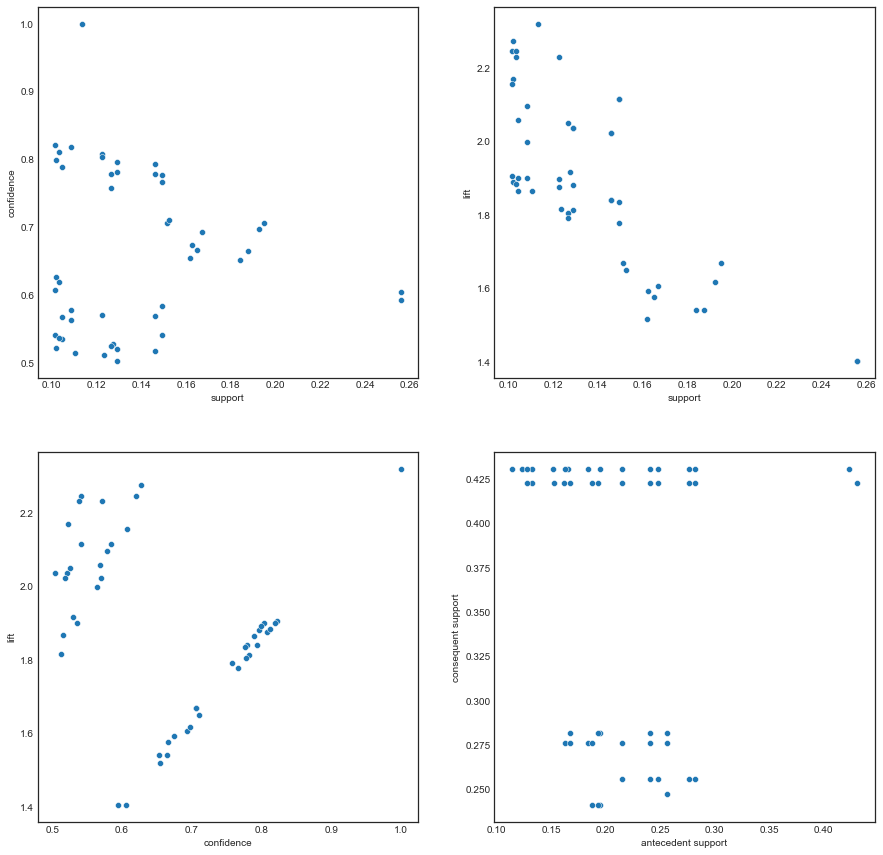

In [83]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=best_associates)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=best_associates)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=best_associates)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=best_associates)
plt.show()

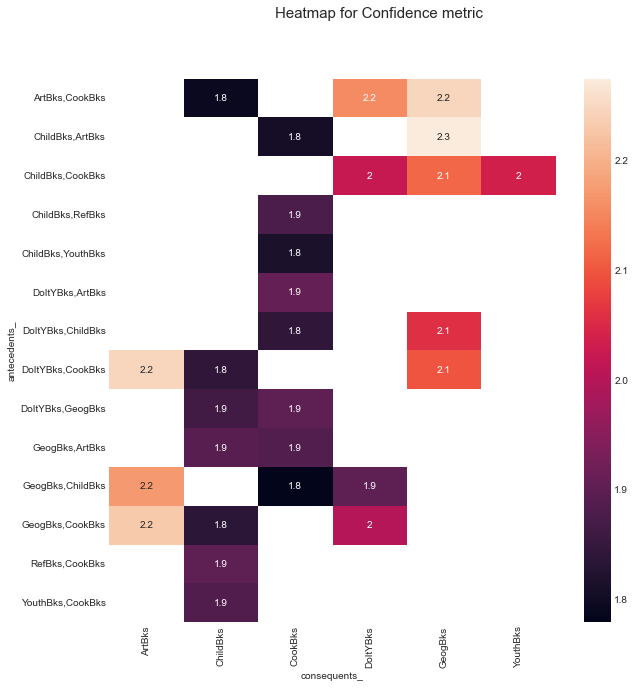

In [84]:
rules=best_associates
plt.figure(figsize=(10,10))
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.suptitle('Heatmap for Confidence metric', fontsize=15)
plt.show()

In [85]:
best_associates_lift = association_rules(freq_itemsets, metric="lift", min_threshold=1.5)
best_associates_lift

antecedents         consequents  antecedent support  ...      lift  leverage  conviction
0           (ChildBks)          (YouthBks)              0.4230  ...  1.576044  0.060308    1.233750
1           (YouthBks)          (ChildBks)              0.2475  ...  1.576044  0.060308    1.731000
2           (DoItYBks)          (ChildBks)              0.2820  ...  1.542511  0.064714    1.660347
3           (ChildBks)          (DoItYBks)              0.4230  ...  1.542511  0.064714    1.270770
4           (ChildBks)            (RefBks)              0.4230  ...  1.669725  0.060767    1.223818
..                 ...                 ...                 ...  ...       ...       ...         ...
93  (GeogBks, CookBks)            (ArtBks)              0.1925  ...  2.230964  0.057107    1.641657
94   (ArtBks, CookBks)           (GeogBks)              0.1670  ...  2.245509  0.057408    1.904063
95           (GeogBks)   (ArtBks, CookBks)              0.2760  ...  2.245509  0.057408    1.332800
96            (ArtBks)  (GeogBks, CookBks)              0.2410  ...  2.230964  0.057107    1.415327
97           (CookBks)   (GeogBks, ArtBks)              0.4310  ...  1.883445  0.048547    1.148237

[98 rows x 9 columns]

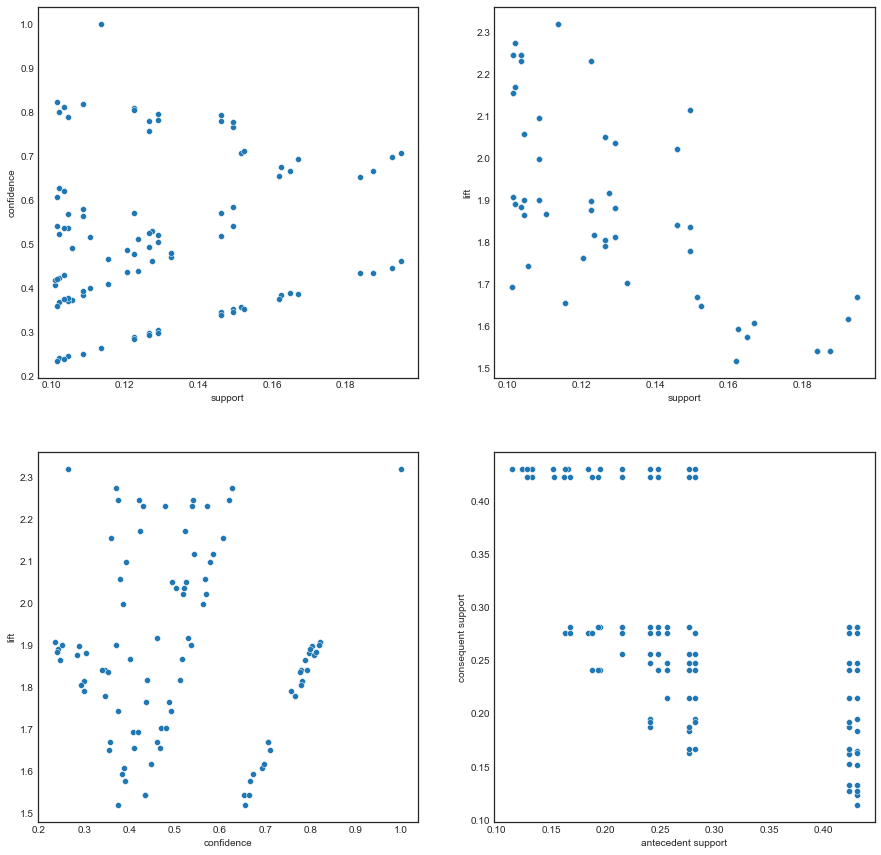

In [86]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=best_associates_lift)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=best_associates_lift)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=best_associates_lift)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=best_associates_lift)
plt.show()

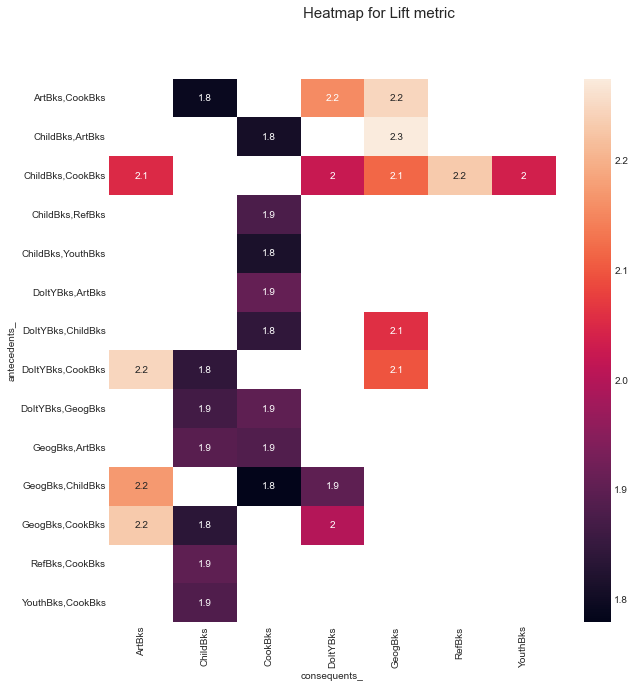

In [90]:
rules=best_associates_lift
plt.figure(figsize=(10,10))
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.suptitle('Heatmap for Lift metric', fontsize=15)
plt.show()

# Fpgrowth Algorithm

In [103]:
freq_itemsets = fpgrowth(book, min_support=0.1, use_colnames=True, verbose=1)
freq_itemsets

9 itemset(s) from tree conditioned on items ()
2 itemset(s) from tree conditioned on items (DoItYBks)
1 itemset(s) from tree conditioned on items (DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (DoItYBks, CookBks)
3 itemset(s) from tree conditioned on items (GeogBks)
2 itemset(s) from tree conditioned on items (GeogBks, DoItYBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, CookBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (GeogBks, ChildBks)
1 itemset(s) from tree conditioned on items (GeogBks, CookBks)
4 itemset(s) from tree conditioned on items (YouthBks)
0 itemset(s) from tree conditioned on items (YouthBks, GeogBks)
0 itemset(s) from tree conditioned on items (YouthBks, DoItYBks)
0 itemset(s) from tree conditioned on items (YouthBks, ChildBks)
1 itemset(s) from tree conditioned on items (YouthBks, CookBks)
1 itemset(s) from tree conditioned on items (ChildBks)
0 itemset

support                       itemsets
0    0.2820                     (DoItYBks)
1    0.2760                      (GeogBks)
2    0.2475                     (YouthBks)
3    0.4230                     (ChildBks)
4    0.4310                      (CookBks)
5    0.2145                       (RefBks)
6    0.2410                       (ArtBks)
7    0.1085                     (Florence)
8    0.1135                     (ItalCook)
9    0.1840           (DoItYBks, ChildBks)
10   0.1875            (DoItYBks, CookBks)
11   0.1460  (DoItYBks, ChildBks, CookBks)
12   0.1325            (DoItYBks, GeogBks)
13   0.1950            (GeogBks, ChildBks)
14   0.1925             (GeogBks, CookBks)
15   0.1085   (DoItYBks, GeogBks, CookBks)
16   0.1045  (DoItYBks, ChildBks, GeogBks)
17   0.1495   (GeogBks, ChildBks, CookBks)
18   0.1205            (GeogBks, YouthBks)
19   0.1155           (DoItYBks, YouthBks)
20   0.1650           (ChildBks, YouthBks)
21   0.1620            (YouthBks, CookBks)
22   0.1290  (ChildBks, YouthBks, CookBks)
23   0.2560            (ChildBks, CookBks)
24   0.1525              (RefBks, CookBks)
25   0.1515             (ChildBks, RefBks)
26   0.1105              (GeogBks, RefBks)
27   0.1055             (DoItYBks, RefBks)
28   0.1225    (ChildBks, RefBks, CookBks)
29   0.1625             (ChildBks, ArtBks)
30   0.1235             (DoItYBks, ArtBks)
31   0.1010             (YouthBks, ArtBks)
32   0.1670              (ArtBks, CookBks)
33   0.1275              (GeogBks, ArtBks)
34   0.1265    (ChildBks, ArtBks, CookBks)
35   0.1015    (DoItYBks, ArtBks, CookBks)
36   0.1035     (GeogBks, ArtBks, CookBks)
37   0.1020    (GeogBks, ChildBks, ArtBks)
38   0.1135            (ItalCook, CookBks)

In [106]:
best_associates_fp = association_rules(freq_itemsets, metric='confidence', min_threshold=0.5)
best_associates_fp

antecedents          consequents  antecedent support  ...      lift  leverage  conviction
0             (DoItYBks)           (ChildBks)              0.2820  ...  1.542511  0.064714    1.660347
1             (DoItYBks)            (CookBks)              0.2820  ...  1.542677  0.065958    1.697968
2   (DoItYBks, ChildBks)            (CookBks)              0.1840  ...  1.841017  0.066696    2.755158
3    (DoItYBks, CookBks)           (ChildBks)              0.1875  ...  1.840820  0.066687    2.606928
4    (ChildBks, CookBks)           (DoItYBks)              0.2560  ...  2.022385  0.073808    1.670982
5             (DoItYBks)  (ChildBks, CookBks)              0.2820  ...  2.022385  0.073808    1.542706
6              (GeogBks)           (ChildBks)              0.2760  ...  1.670264  0.078252    1.966074
7              (GeogBks)            (CookBks)              0.2760  ...  1.618245  0.073544    1.880766
8    (DoItYBks, GeogBks)            (CookBks)              0.1325  ...  1.899926  0.051392    3.141354
9    (DoItYBks, CookBks)            (GeogBks)              0.1875  ...  2.096618  0.056750    1.718354
10    (GeogBks, CookBks)           (DoItYBks)              0.1925  ...  1.998711  0.054215    1.645417
11  (DoItYBks, ChildBks)            (GeogBks)              0.1840  ...  2.057735  0.053716    1.675673
12   (DoItYBks, GeogBks)           (ChildBks)              0.1325  ...  1.864490  0.048452    2.730446
13   (GeogBks, ChildBks)           (DoItYBks)              0.1950  ...  1.900346  0.049510    1.547072
14   (GeogBks, ChildBks)            (CookBks)              0.1950  ...  1.778809  0.065455    2.438571
15    (GeogBks, CookBks)           (ChildBks)              0.1925  ...  1.835989  0.068072    2.583081
16   (ChildBks, CookBks)            (GeogBks)              0.2560  ...  2.115885  0.078844    1.740319
17             (GeogBks)  (ChildBks, CookBks)              0.2760  ...  2.115885  0.078844    1.623273
18            (YouthBks)           (ChildBks)              0.2475  ...  1.576044  0.060308    1.731000
19            (YouthBks)            (CookBks)              0.2475  ...  1.518667  0.055328    1.647105
20  (ChildBks, YouthBks)            (CookBks)              0.1650  ...  1.813963  0.057885    2.607917
21   (ChildBks, CookBks)           (YouthBks)              0.2560  ...  2.035985  0.065640    1.516850
22   (YouthBks, CookBks)           (ChildBks)              0.1620  ...  1.882497  0.060474    2.832545
23            (YouthBks)  (ChildBks, CookBks)              0.2475  ...  2.035985  0.065640    1.553924
24            (ChildBks)            (CookBks)              0.4230  ...  1.404179  0.073687    1.441240
25             (CookBks)           (ChildBks)              0.4310  ...  1.404179  0.073687    1.421069
26              (RefBks)            (CookBks)              0.2145  ...  1.649549  0.060050    1.968556
27              (RefBks)           (ChildBks)              0.2145  ...  1.669725  0.060767    1.964548
28              (RefBks)            (GeogBks)              0.2145  ...  1.866491  0.051298    1.493250
29    (ChildBks, RefBks)            (CookBks)              0.1515  ...  1.876058  0.057204    2.972534
30     (RefBks, CookBks)           (ChildBks)              0.1525  ...  1.899004  0.057993    2.933083
31              (RefBks)  (ChildBks, CookBks)              0.2145  ...  2.230842  0.067588    1.734652
32              (ArtBks)           (ChildBks)              0.2410  ...  1.594028  0.060557    1.771427
33              (ArtBks)           (DoItYBks)              0.2410  ...  1.817192  0.055538    1.472664
34              (ArtBks)            (CookBks)              0.2410  ...  1.607763  0.063129    1.853095
35              (ArtBks)            (GeogBks)              0.2410  ...  1.916832  0.060984    1.537304
36    (ChildBks, ArtBks)            (CookBks)              0.1625  ...  1.806175  0.056462    2.568403
37     (ArtBks, CookBks)           (ChildBks)              0.1670  ...  1.790745  0.055859    2.379

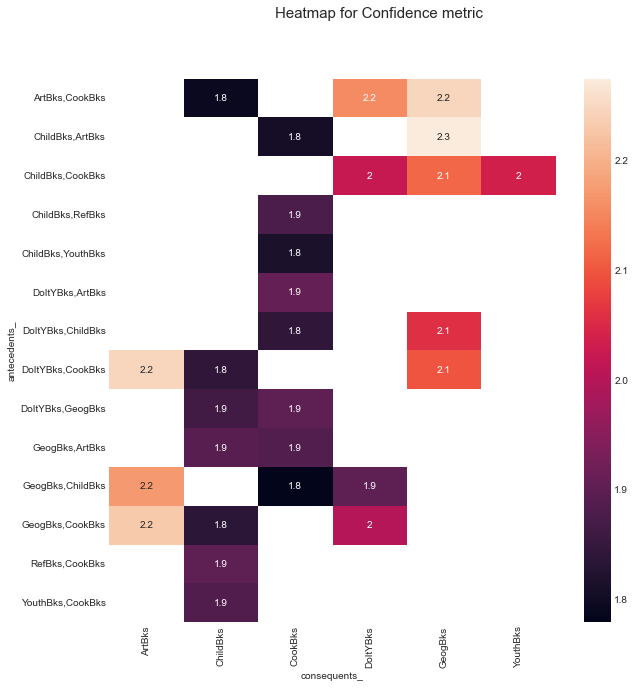

In [107]:
rules=best_associates_fp
plt.figure(figsize=(10,10))
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.suptitle('Heatmap for Confidence metric', fontsize=15)
plt.show()

In [111]:
best_associates_fp_lift = association_rules(freq_itemsets, metric='lift', min_threshold=1)
best_associates_fp_lift

antecedents          consequents  antecedent support  ...      lift  leverage  conviction
0             (DoItYBks)           (ChildBks)              0.2820  ...  1.542511  0.064714    1.660347
1             (ChildBks)           (DoItYBks)              0.4230  ...  1.542511  0.064714    1.270770
2             (DoItYBks)            (CookBks)              0.2820  ...  1.542677  0.065958    1.697968
3              (CookBks)           (DoItYBks)              0.4310  ...  1.542677  0.065958    1.270875
4   (DoItYBks, ChildBks)            (CookBks)              0.1840  ...  1.841017  0.066696    2.755158
..                   ...                  ...                 ...  ...       ...       ...         ...
95             (GeogBks)   (ChildBks, ArtBks)              0.2760  ...  2.274247  0.057150    1.328448
96            (ChildBks)    (GeogBks, ArtBks)              0.4230  ...  1.891253  0.048067    1.149743
97              (ArtBks)  (GeogBks, ChildBks)              0.2410  ...  2.170444  0.055005    1.395719
98            (ItalCook)            (CookBks)              0.1135  ...  2.320186  0.064582         inf
99             (CookBks)           (ItalCook)              0.4310  ...  2.320186  0.064582    1.203406

[100 rows x 9 columns]

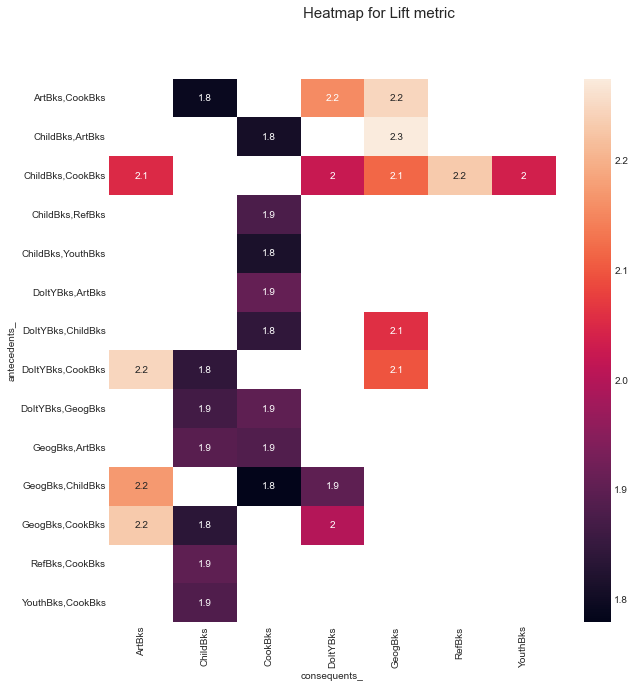

In [112]:
rules=best_associates_fp_lift
plt.figure(figsize=(10,10))
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.suptitle('Heatmap for Lift metric', fontsize=15)
plt.show()